Initial MSE (Scratch GD): 26548.584269662922
Initial MSE (Closed Form baseline): 5361.533457238513
Initial MSE (Sklearn baseline): 5361.533457238513
Final MSE (Scratch GD): 4716.855348115728
Final MSE (Closed Form): 4061.8259284949268
Final MSE (Sklearn): 4061.8259284949268


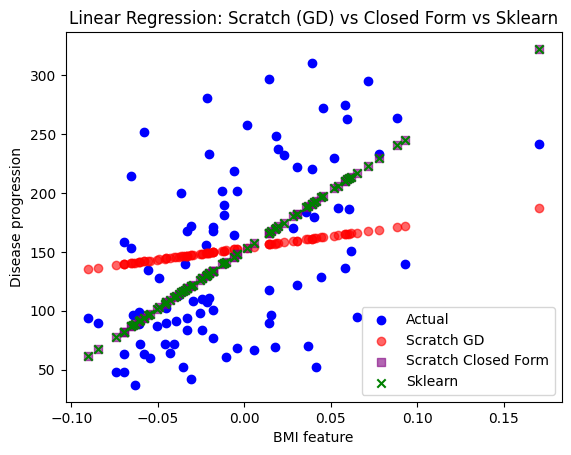


Prediction for sample BMI=0.05
Scratch GD Model: 163.37918502298615
Closed Form Model: 201.93223867135964
Sklearn Model: 201.93223867135967


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as SklearnLR
from sklearn.metrics import mean_squared_error

# ==============================
# Linear Regression from Scratch (Gradient Descent)
# ==============================
class LinearRegressionScratch:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def compute_mse(self, X, y):
        y_pred = self.predict(X)
        return np.mean((y - y_pred) ** 2)


# ==============================
# Linear Regression (Closed Form / Normal Equation)
# ==============================
class LinearRegressionClosedForm:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Add bias column (1s)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        # Normal Equation: θ = (X^T X)^(-1) X^T y
        theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        self.bias = theta_best[0]
        self.weights = theta_best[1:]

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def compute_mse(self, X, y):
        y_pred = self.predict(X)
        return np.mean((y - y_pred) ** 2)


# ==============================
# Load dataset
# ==============================
data = load_diabetes()
X, y = data.data, data.target

# Use one feature for easy visualization (BMI)
X = X[:, np.newaxis, 2]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==============================
# Initial MSE before training
# ==============================
# Scratch (GD): starts with weights=0, bias=0
y_pred_initial_scratch = np.zeros_like(y_test)
mse_initial_scratch = mean_squared_error(y_test, y_pred_initial_scratch)

# Scratch (Closed Form): no "initial", but for fairness compare constant mean baseline
y_pred_initial_cf = np.full_like(y_test, np.mean(y_train))
mse_initial_cf = mean_squared_error(y_test, y_pred_initial_cf)

# Scikit-learn: baseline = mean of y_train
y_pred_initial_sklearn = np.full_like(y_test, np.mean(y_train))
mse_initial_sklearn = mean_squared_error(y_test, y_pred_initial_sklearn)

print("Initial MSE (Scratch GD):", mse_initial_scratch)
print("Initial MSE (Closed Form baseline):", mse_initial_cf)
print("Initial MSE (Sklearn baseline):", mse_initial_sklearn)

# ==============================
# Train models
# ==============================
# Scratch (Gradient Descent)
model_scratch = LinearRegressionScratch(lr=0.1, n_iters=1000)
model_scratch.fit(X_train, y_train)
y_pred_scratch = model_scratch.predict(X_test)
mse_scratch = model_scratch.compute_mse(X_test, y_test)
print("Final MSE (Scratch GD):", mse_scratch)

# Scratch (Closed Form)
model_cf = LinearRegressionClosedForm()
model_cf.fit(X_train, y_train)
y_pred_cf = model_cf.predict(X_test)
mse_cf = model_cf.compute_mse(X_test, y_test)
print("Final MSE (Closed Form):", mse_cf)

# Scikit-learn
model_sklearn = SklearnLR()
model_sklearn.fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict(X_test)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print("Final MSE (Sklearn):", mse_sklearn)

# ==============================
# Visualization
# ==============================
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.scatter(X_test, y_pred_scratch, color="red", label="Scratch GD", alpha=0.6)
plt.scatter(X_test, y_pred_cf, color="purple", marker="s", label="Scratch Closed Form", alpha=0.6)
plt.scatter(X_test, y_pred_sklearn, color="green", marker="x", label="Sklearn")
plt.xlabel("BMI feature")
plt.ylabel("Disease progression")
plt.title("Linear Regression: Scratch (GD) vs Closed Form vs Sklearn")
plt.legend()
plt.show()

# ==============================
# Prediction Example
# ==============================
sample_input = np.array([[0.05]])  # example BMI value
scratch_prediction = model_scratch.predict(sample_input)
cf_prediction = model_cf.predict(sample_input)
sklearn_prediction = model_sklearn.predict(sample_input)

print("\nPrediction for sample BMI=0.05")
print("Scratch GD Model:", scratch_prediction[0])
print("Closed Form Model:", cf_prediction[0])
print("Sklearn Model:", sklearn_prediction[0])
